<a id="goal"></a>
## Project Description and Goal

<font color="blue">
You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.<br>
You need to prioritize these hypotheses, launch an A/B test, and analyze the results.

<a id="Download"></a> 
## Step 1. Open the data file and study the general information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import datetime as dt
import numpy as np
import warnings
import sys

In [2]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [4]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [6]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [9]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


## Conclusion

<font color="blue">
    
We downloaded 3 datasets: visits, orders and hypotheses.<br>
There are no missing values.

## Step 2. Data preprocessing

In [11]:
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [12]:
visits.isnull().sum()

date      0
group     0
visits    0
dtype: int64

In [13]:
orders.date=pd.to_datetime(orders.date)

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [15]:
visits.date=pd.to_datetime(visits.date)

In [16]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [17]:
visits.duplicated().sum()

0

In [18]:
orders.duplicated().sum()

0

In [19]:
visits.date.min()

Timestamp('2019-08-01 00:00:00')

In [20]:
visits.date.max()

Timestamp('2019-08-31 00:00:00')

In [21]:
orders.group.value_counts()

B    640
A    557
Name: group, dtype: int64

- **we check the data for users which are in both groups and drop them.**

In [22]:
orders_grouped=orders.groupby('visitorId').agg({'group':"nunique"}).reset_index()

In [23]:
len(orders_grouped[orders_grouped['group']==2])

58

In [24]:
orders_not_in_both_groups=orders_grouped[orders_grouped['group']!=2]
orders_not_in_both_groups.drop(["group"], axis = 1, inplace = True)
orders_not_in_both_groups.head()

,visitorId
0,5114589
1,6958315
3,11685486
4,39475350
5,47206413


In [25]:
orders= orders.merge(orders_not_in_both_groups, on='visitorId')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,3797467345,1196621759,2019-08-15,155.1,B
3,2282983706,2322279887,2019-08-15,40.5,B
4,182168103,935554773,2019-08-15,35.0,B


## Conclusion

<font color="blue">
We checked each column for the correct data type. Also for  duplicates.      <br>
and we checked the data for users which were in both A and B group and droped them.    

<a id="Prioritizing"></a> 

## Step 3: Prioritizing Hypotheses

In [26]:
hypotheses.head(1)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6


- **Applying the ICE and RICE framework to prioritize hypotheses**

In [27]:
hypotheses['ICE']=(hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']

In [28]:
hypotheses[{'Hypothesis','ICE'}].sort_values('ICE', ascending=False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [29]:
hypotheses['RICE']=(hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']

In [30]:
hypotheses[{'Hypothesis','RICE'}].sort_values('RICE', ascending=False)

,RICE,Hypothesis
7,112.0,Add a subscription form to all the main pages....
2,56.0,Add product recommendation blocks to the store...
0,40.0,Add two new channels for attracting traffic. T...
6,40.0,Show banners with current offers and sales on ...
8,16.2,Launch a promotion that gives users discounts ...
3,9.0,Change the category structure. This will incre...
1,4.0,Launch your own delivery service. This will sh...
5,4.0,Add a customer review page. This will increase...
4,3.0,Change the background color on the main page. ...


## Conclusion

<font color="blue">
    
According to the ICE criterion, the priority of the hypotheses is: 8, 0, 7, 6 and 2  <br>
and according to the criterion RICE the priority is: 7, 2, 0, 6 and 8  <br>  The Reach parameter is for Hypotheses 7 and 2 higher. Although Hypotheses 0 and 8 have more Intensity of impact, Hypotheses 2 and 7 affect more users. 

<a id="test"></a>
## Step 4:  A/B Test Analysis

In [31]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,3797467345,1196621759,2019-08-15,155.1,B
3,2282983706,2322279887,2019-08-15,40.5,B
4,182168103,935554773,2019-08-15,35.0,B


In [32]:
visits.head(2)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619


In [33]:
datesGroups=orders[['date','group']].drop_duplicates()
datesGroups.head(1)

,date,group
0,2019-08-15,B


 - **Calculating cumulative revenue by group and graphing it**

In [34]:
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
].agg({'date' : 'max', 'group' : 'max', 'visitorId' : pd.Series.nunique, 'transactionId' : pd.Series.nunique, 
'revenue' : 'sum'}), axis=1
).sort_values(by=['date','group'])

In [35]:
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [36]:
cumulativeData = ordersAggregated.merge(visitsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.tail(5)

,date,group,orders,buyers,revenue,visitors
57,2019-08-29,B,490,510,74576.7,17708
58,2019-08-30,A,437,460,52363.7,18037
59,2019-08-30,B,511,531,77863.5,18198
60,2019-08-31,A,445,468,53212.0,18736
61,2019-08-31,B,528,548,79651.2,18916


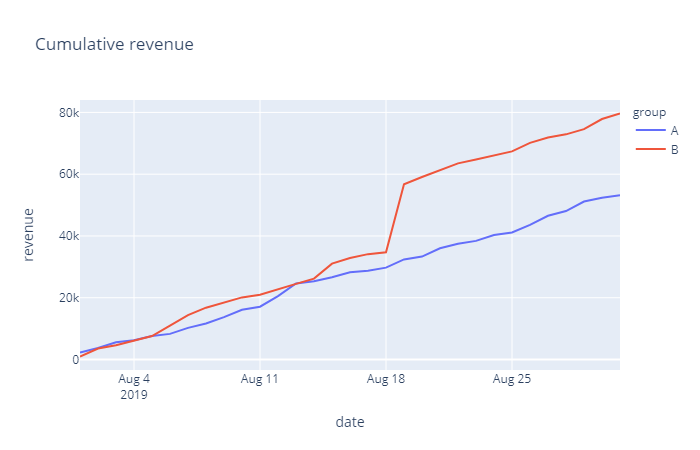

In [37]:
fig = px.line(cumulativeData, x='date', y='revenue', color='group', title='Cumulative revenue')
fig.show("png")

<font color="blue">

Revenue is rising steadily throughout the whole test. We see that for Group B, sales increase sharply in the second half of the test and hold on to it. This may be due to an increase in orders or very expensive orders in the sample.    

 - **Calculating cumulative average order size by group and graphing it**

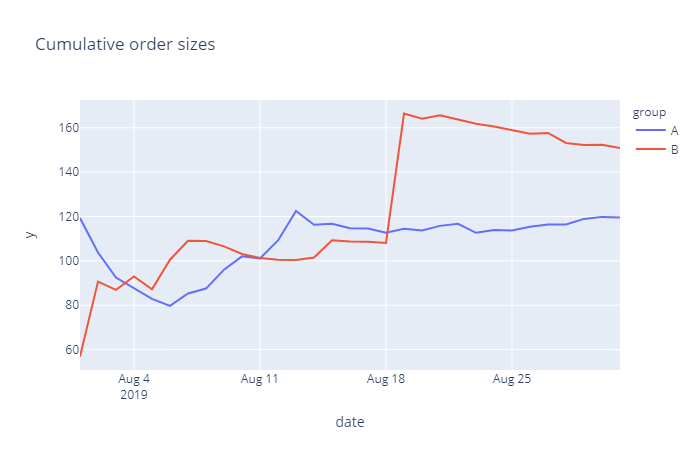

In [38]:
fig = px.line(cumulativeData, x='date', y=cumulativeData['revenue']/cumulativeData['orders'] , color='group', title='Cumulative order sizes')
fig.show("png")

<font color="blue">
    
The average order size for group A decreases in the first half of the test and then increases again, and stabilizes by the end of the test.<br>
For Group B, the average order size usually increases. It decreases towards the end of the test. The surge in group B in the second half of the test may have been due to the presence of large, expensive orders.    

 - **Graphing relative difference in cumulative average order size**

In [39]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [40]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])

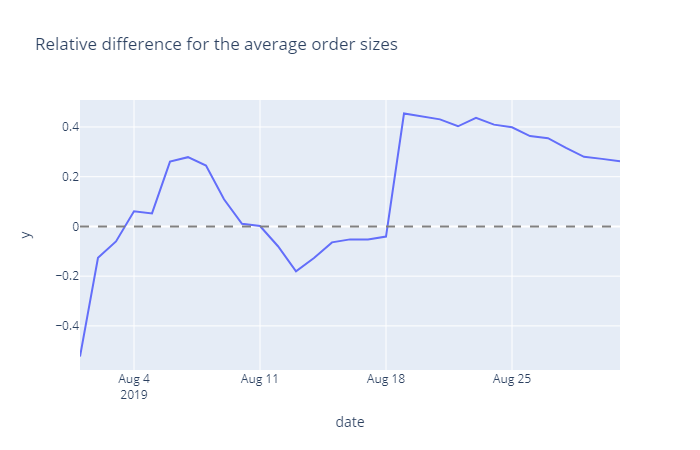

In [41]:
fig = px.line(mergedCumulativeRevenue, x='date', y= (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1,  title='Relative difference for the average order sizes')
fig.add_hline(y=0,line_width=2, line_dash="dash", line_color="gray")
fig.show("png")

<font color="blue">

At several points the difference between the segments spikes. Maybe there are some big orders and outliers.    

In [42]:
cumulativeData.head(2)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,19,23,2266.6,719
1,2019-08-01,B,17,17,967.2,713


 - **Calculating each group's conversion rate and graphing them**

In [43]:
cumulativeData['conversion'] = cumulativeData['buyers']/cumulativeData['visitors']

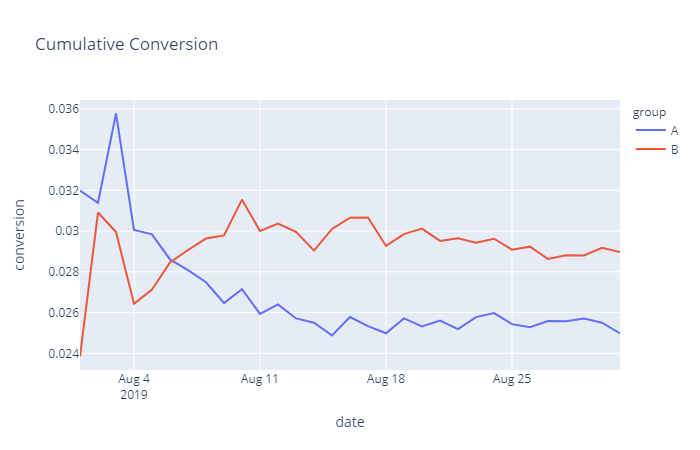

In [44]:
fig = px.line(cumulativeData, x='date', y='conversion', color='group', title='Cumulative Conversion')
fig.show("png")

<font color="blue">
    
The conversion for both groups fluctuate at first. then the conversion rate of group B rose before stabilizing, while the conversion rate of group A dropped but then stabilized, too.    

 - **Graphing relative difference in cumulative conversion**

In [45]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

In [46]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

In [47]:
mergedCumulativeConversions.head(1)

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843


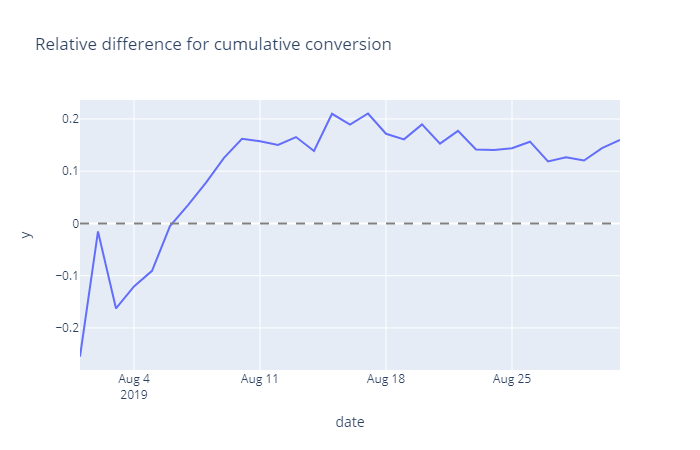

In [48]:
fig = px.line(mergedCumulativeConversions, x='date', y= mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,  title='Relative difference for cumulative conversion')
fig.add_hline(y=0,line_width=2, line_dash="dash", line_color="gray")
fig.show("png")

<font color="blue">

The relative conversion rate for group B fluctuated first and then took the lead. Then It gradually  decreases, but is still in the lead. It stabilizes 20% higher than group A.

 - **Ploting a scatter chart of the number of orders per user**

In [49]:
orders.head(2)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B


In [50]:
orders_by_users=orders.groupby('visitorId').agg({'transactionId': 'nunique'}).reset_index()
orders_by_users.columns = ['userId', 'orders']

In [51]:
orders_by_users.sort_values(by='orders', ascending=False).head(5)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


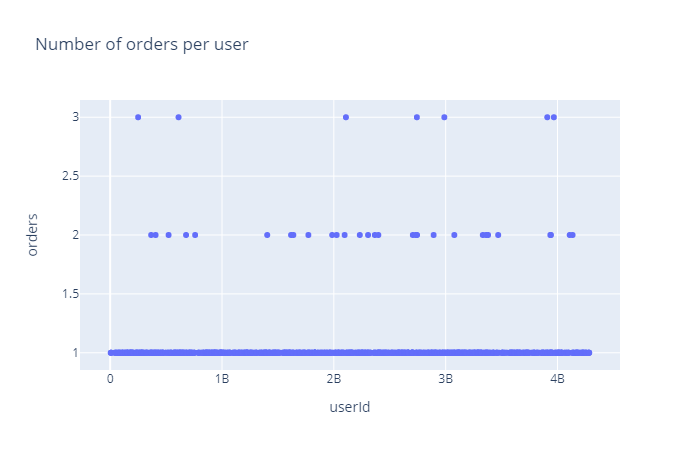

In [52]:
fig = px.scatter(orders_by_users, x='userId', y='orders', title='Number of orders per user')
fig.show("png")

 - **Calculating the 95th and 99th percentiles for the number of orders per user**

In [53]:
np.percentile(orders_by_users['orders'], [95, 99])

array([1., 2.])

<font color="blue">

There are a small number of users with more than one order. These may be abnormal. 5% of users have ordered more than 1 and 1% of users have ordered more than 2.

In [54]:
orders.head(1)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B


In [55]:
orders.drop(['transactionId'], axis=1).sort_values('revenue',ascending=False).head(5)

,visitorId,date,revenue,group
376,1920142716,2019-08-19,19920.4,B
1015,2108080724,2019-08-15,3120.1,B
973,1307669133,2019-08-13,1425.8,A
645,888512513,2019-08-27,1335.6,B
644,4133034833,2019-08-09,1050.0,A


 - **Ploting a scatter chart of order prices**

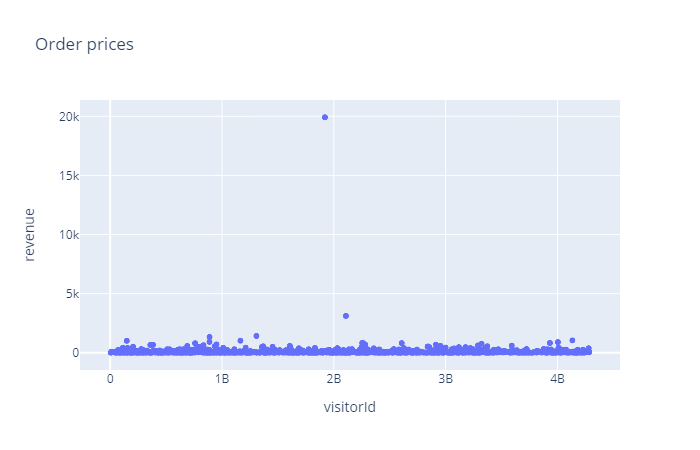

In [56]:
fig = px.scatter(orders, x='visitorId', y='revenue', title='Order prices')
fig.show("png")

In [57]:
# Calculating the 95th and 99th percentiles of order prices

np.percentile(orders['revenue'],[95,99])

array([414.275, 830.3  ])

<font color="blue">

There is only one order for 2500 and one for  20000.  5% of users placed orderes that cost more than 414 and 1% of users placed orderes that cost more than 830. So we can consider the purchase limit of 2500.

 - **finding the statistical significance of the difference in conversion between the groups using the raw data**

In [58]:
orders.head(1)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B


In [59]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [60]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

<font color="blue">
      
  - H0: The conversion rate of two groups are the same.
  - H1: The conversion rate of two groups are different.

In [61]:
alpha=0.05
stat, p=stats.mannwhitneyu(sampleA, sampleB)

print("{0:.3f}".format(p))

if p< alpha:
    print("the null Hypothesis will be rejected")
else:
    print("the null Hypothesis can't be rejected")
        
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.006
the null Hypothesis will be rejected
0.160


<font color="blue">
    
Based on the raw data, the null Hypothesis is rejected, so there is a significant difference between the conversion rate of two groups.   
the relative conversion gain for group B is 16%    

 - **finding the statistical significance of the difference in average order size between the groups using the raw data**

<font color="blue">
      
  - H0: The average order size between the groups are the same.
  - H1: The average order size between the groups are different.

In [62]:
stat ,p= stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('{0:.3f}'.format(p))

if p< alpha:
    print("the null Hypothesis will be rejected")
else:
    print("the null Hypothesis can't be rejected")
    
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.431
the null Hypothesis can't be rejected
0.278


<font color="blue">
    
Based on the raw data, the null Hypothesis is not rejected, so there is not a significant difference in average order size between the two groups.   
The average order size for group B is 28% higher than group A.   

<font color="blue">
    
Acording to the scatter charts, we filter the data by the users who made orders more than 2 and also users who made orders which prices are more than 2500.    

 - **finding the statistical significance of the difference in conversion between the groups using the filtered data**

In [63]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 2500]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

33       249864742
58       611059232
376     1920142716
1015    2108080724
211     2108163459
dtype: int64
(9,)


In [64]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

<font color="blue">
      
  - H0: The conversion between the filtered groups are the same.
  - H1: The conversion between the filtered groups are different.

In [65]:
stst ,p=stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print("{0:.3f}".format(p))

if p< alpha:
    print("the null Hypothesis will be rejected")
else:
    print("the null Hypothesis can't be rejected")
    
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.005
the null Hypothesis will be rejected
0.181


<font color="blue">
    
Based on the filtered data, the null Hypothesis is still rejected, so there is a significant difference between the conversion rate of two groups.   
the relative conversion gain for group B is 18%.
The results for conversion almost didn't change.

 - **finding the statistical significance of the difference in average order size between the groups using the filtered data**

<font color="blue">
      
  - H0: The average order size between the filtered groups are the same.
  - H1: The average order size between the filtered groups are different.

In [66]:
stst,p=stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])

print('{0:.3f}'.format(p))

if p< alpha:
    print("the null Hypothesis will be rejected")
else:
    print("the null Hypothesis can't be rejected")

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.337
the null Hypothesis can't be rejected
-0.091


<font color="blue">
    
Based on the filtered data, the null Hypothesis is still not rejected, so there is not a significant difference in average order size between the two groups.   
But the average order size for group B is now 9% smaller than group A.  

## Conclusion

<font color="blue">

The facts:
   - Both raw and filtered data revealed statistically significant differences in conversion between the groups.
   - Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups.
   - The graph showing the difference in conversion between the groups tells us that Group B's results are growing and are currently about 20% higher than Group A.
   - The graph showing the difference in average order size between the groups tells us that The average order size for group B was affected by the anomaly and was higher than group A, but after eliminating the anomaly, the order size is 9% lower than group A. 
    
Based on these facts, we stop the test and conclude that the test is successful(group B is leader).     


## step 5: Overall Conclusion

<font color="blue">
    
### [Goal](#goal)
Prioritizing hypotheses, launching an A/B test, and analyzing the results.
    
### [Prioritizing Hypotheses](#Prioritizing)
    
 - According to the ICE criterion, the priority of the hypotheses is: 8, 0, 7, 6 and 2 
    
 - According to the criterion RICE the priority is: 7, 2, 0, 6 and 8
    
The Reach parameter is for Hypotheses 7 and 2 higher. Although Hypotheses 0 and 8 have more Intensity of impact, Hypotheses 2 and 7 affect more users.     
    
### [A/B Test Key Findings](#test)
    
   - Both raw and filtered data revealed statistically significant differences in conversion between the groups.
   - Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups.
   - The graph showing the difference in conversion between the groups tells us that Group B's results are growing and are currently about 20% higher than Group A.
   - The graph showing the difference in average order size between the groups tells us that The average order size for group B was affected by the anomaly and was higher than group A, but after eliminating the anomaly, the order size is 9% lower than group A. 
    
### Final Conclusion    
Based on these facts, we stop the test and conclude that the test is successful(group B is leader).     